In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
dataOrig = pd.read_csv("feature_extraction/dataOrig.csv",usecols=lambda column: column != 'filename')

In [3]:
dataOrig.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,-0.841709,2.132198,1.083206,-0.077104,0.648073,-1.484534,3.725629,4.553656,4.274244,pop
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,pop
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,pop
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,pop
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649557,-2.744086,0.305748,pop


In [4]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dataOrig['genre'] = dataOrig['genre'].map(mappingGenresToIntegers)
dataOrig.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,-0.841709,2.132198,1.083206,-0.077104,0.648073,-1.484534,3.725629,4.553656,4.274244,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649557,-2.744086,0.305748,0


In [5]:
X = dataOrig.iloc[:, :-1]
y = dataOrig.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196


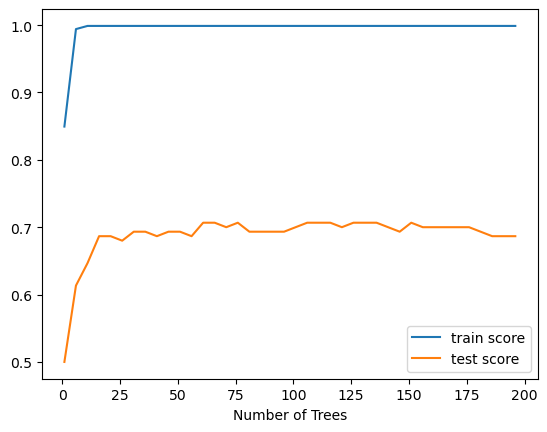

In [11]:
train_scores = np.zeros(0)
test_scores = np.zeros(0)

for i in range(1,201, 5):
    print(i)
    random_forest = XGBClassifier(n_estimators=i,max_depth=7,random_state=42)
    random_forest.fit(X_train,y_train)
    train_scores = np.hstack([train_scores, random_forest.score(X_train,y_train)])
    test_scores = np.hstack([test_scores, random_forest.score(X_test,y_test)])
    
ax = sns.lineplot(x=range(1,201, 5),y=train_scores,label="train score")
sns.lineplot(x=range(1,201, 5),y=test_scores,label="test score")
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

The test score is relatively the same for n_estimators > 25

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


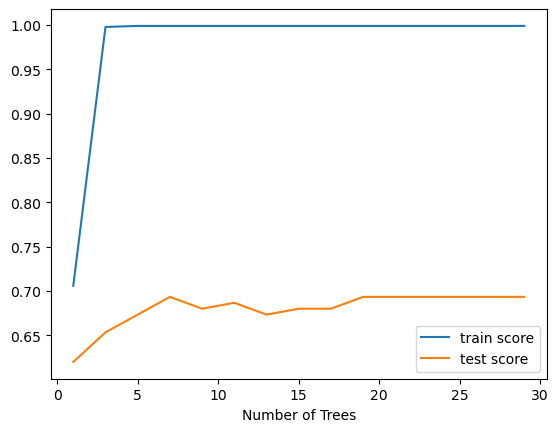

In [12]:
train_scores = np.zeros(0)
test_scores = np.zeros(0)

for i in range(1,31, 2):
    print(i)
    random_forest = XGBClassifier(n_estimators=30,max_depth=i,random_state=42)
    random_forest.fit(X_train,y_train)
    train_scores = np.hstack([train_scores, random_forest.score(X_train,y_train)])
    test_scores = np.hstack([test_scores, random_forest.score(X_test,y_test)])
    
ax = sns.lineplot(x=range(1,31, 2),y=train_scores,label="train score")
sns.lineplot(x=range(1,31, 2),y=test_scores,label="test score")
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

# GridSearchCV

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50)
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 15, 25],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

XGBGridSearch = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=10)

XGBGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10
[CV 1/5; 1/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.512 total time=   1.3s
[CV 2/5; 1/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10
[CV 2/5; 1/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.559 total time=   0.9s
[CV 3/5; 1/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10
[CV 3/5; 1/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.541 total time=   0.3s
[CV 4/5; 1/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10
[CV 4/5; 1/243] END colsample_bytree=0.8, learning_rate=0.1

[CV 4/5; 7/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=10;, score=0.553 total time=   0.1s
[CV 5/5; 7/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=10
[CV 5/5; 7/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=10;, score=0.529 total time=   0.1s
[CV 1/5; 8/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=15
[CV 1/5; 8/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=15;, score=0.524 total time=   0.2s
[CV 2/5; 8/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=15
[CV 2/5; 8/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=15;, score=0.535 total time=   0.2s
[CV 3/5; 8/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight

[CV 1/5; 14/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.565 total time=   0.3s
[CV 2/5; 14/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15
[CV 2/5; 14/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.588 total time=   0.3s
[CV 3/5; 14/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15
[CV 3/5; 14/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.576 total time=   0.3s
[CV 4/5; 14/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15
[CV 4/5; 14/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.576 total time=   0.2s
[CV 5/5; 14/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=5, min_chil

[CV 3/5; 20/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=15;, score=0.576 total time=   0.4s
[CV 4/5; 20/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=15
[CV 4/5; 20/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=15;, score=0.600 total time=   0.5s
[CV 5/5; 20/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=15
[CV 5/5; 20/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=15;, score=0.606 total time=   0.5s
[CV 1/5; 21/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=25
[CV 1/5; 21/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=25;, score=0.582 total time=   0.8s
[CV 2/5; 21/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_chil

[CV 5/5; 26/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=15;, score=0.588 total time=   0.5s
[CV 1/5; 27/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=25
[CV 1/5; 27/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=25;, score=0.582 total time=   0.7s
[CV 2/5; 27/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=25
[CV 2/5; 27/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=25;, score=0.612 total time=   0.9s
[CV 3/5; 27/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=25
[CV 3/5; 27/243] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=25;, score=0.582 total time=   0.9s
[CV 4/5; 27/243] START colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_chil

[CV 2/5; 33/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.494 total time=   0.4s
[CV 3/5; 33/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25
[CV 3/5; 33/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.500 total time=   0.3s
[CV 4/5; 33/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25
[CV 4/5; 33/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.535 total time=   0.3s
[CV 5/5; 33/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25
[CV 5/5; 33/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.482 total time=   0.5s
[CV 1/5; 34/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=3, 

[CV 4/5; 39/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=25;, score=0.529 total time=   0.6s
[CV 5/5; 39/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=25
[CV 5/5; 39/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=25;, score=0.582 total time=   0.6s
[CV 1/5; 40/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=10
[CV 1/5; 40/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=10;, score=0.506 total time=   0.2s
[CV 2/5; 40/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=10
[CV 2/5; 40/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=10;, score=0.512 total time=   0.2s
[CV 3/5; 40/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=5, 

[CV 1/5; 46/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.535 total time=   1.2s
[CV 2/5; 46/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10
[CV 2/5; 46/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.524 total time=   0.7s
[CV 3/5; 46/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10
[CV 3/5; 46/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.518 total time=   0.4s
[CV 4/5; 46/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10
[CV 4/5; 46/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.559 total time=   0.3s
[CV 5/5; 46/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, 

[CV 3/5; 52/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=10;, score=0.512 total time=   0.2s
[CV 4/5; 52/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=10
[CV 4/5; 52/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=10;, score=0.488 total time=   0.3s
[CV 5/5; 52/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=10
[CV 5/5; 52/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=10;, score=0.494 total time=   0.2s
[CV 1/5; 53/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=15
[CV 1/5; 53/243] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=15;, score=0.471 total time=   0.4s
[CV 2/5; 53/243] START colsample_bytree=0.8, learning_rate=0.01, max_depth=7, 

[CV 1/5; 59/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.435 total time=   0.3s
[CV 2/5; 59/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15
[CV 2/5; 59/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.500 total time=   0.2s
[CV 3/5; 59/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15
[CV 3/5; 59/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.494 total time=   0.2s
[CV 4/5; 59/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15
[CV 4/5; 59/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.494 total time=   0.2s
[CV 5/5; 59/243] START colsample_bytree=0.8, learning_rate=0.001, max_d

[CV 3/5; 65/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=15;, score=0.518 total time=   0.3s
[CV 4/5; 65/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=15
[CV 4/5; 65/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=15;, score=0.500 total time=   0.3s
[CV 5/5; 65/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=15
[CV 5/5; 65/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=15;, score=0.553 total time=   0.5s
[CV 1/5; 66/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=25
[CV 1/5; 66/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=25;, score=0.518 total time=   0.6s
[CV 2/5; 66/243] START colsample_bytree=0.8, learning_rate=0.001, max_d

[CV 5/5; 71/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=15;, score=0.529 total time=   0.2s
[CV 1/5; 72/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=25
[CV 1/5; 72/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=25;, score=0.447 total time=   0.6s
[CV 2/5; 72/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=25
[CV 2/5; 72/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=25;, score=0.506 total time=   0.5s
[CV 3/5; 72/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=25
[CV 3/5; 72/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=25;, score=0.512 total time=   0.5s
[CV 4/5; 72/243] START colsample_bytree=0.8, learning_rate=0.001, max_d

[CV 2/5; 78/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.547 total time=   0.5s
[CV 3/5; 78/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25
[CV 3/5; 78/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.553 total time=   0.5s
[CV 4/5; 78/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25
[CV 4/5; 78/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.535 total time=   0.5s
[CV 5/5; 78/243] START colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25
[CV 5/5; 78/243] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.565 total time=   0.6s
[CV 1/5; 79/243] START colsample_bytree=0.8, learning_rate=0.001, max_d

[CV 4/5; 84/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=25;, score=0.588 total time=   0.5s
[CV 5/5; 84/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=25
[CV 5/5; 84/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=25;, score=0.594 total time=   0.8s
[CV 1/5; 85/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=10
[CV 1/5; 85/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=10;, score=0.524 total time=   0.1s
[CV 2/5; 85/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=10
[CV 2/5; 85/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=10;, score=0.529 total time=   0.1s
[CV 3/5; 85/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=3, min_chil

[CV 1/5; 91/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.524 total time=   0.3s
[CV 2/5; 91/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10
[CV 2/5; 91/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.576 total time=   0.2s
[CV 3/5; 91/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10
[CV 3/5; 91/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.535 total time=   0.2s
[CV 4/5; 91/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10
[CV 4/5; 91/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.576 total time=   0.3s
[CV 5/5; 91/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_chil

[CV 4/5; 97/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=10;, score=0.553 total time=   0.2s
[CV 5/5; 97/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=10
[CV 5/5; 97/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=10;, score=0.582 total time=   0.2s
[CV 1/5; 98/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=15
[CV 1/5; 98/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=15;, score=0.576 total time=   0.3s
[CV 2/5; 98/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=15
[CV 2/5; 98/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=15;, score=0.588 total time=   0.3s
[CV 3/5; 98/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=5, min_chil

[CV 1/5; 104/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.559 total time=   0.3s
[CV 2/5; 104/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15
[CV 2/5; 104/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.582 total time=   0.3s
[CV 3/5; 104/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15
[CV 3/5; 104/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.565 total time=   0.4s
[CV 4/5; 104/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15
[CV 4/5; 104/243] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.612 total time=   0.4s
[CV 5/5; 104/243] START colsample_bytree=0.9, learning_rate=0.1, max_depth=7, 

[CV 3/5; 110/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=15;, score=0.506 total time=   0.2s
[CV 4/5; 110/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=15
[CV 4/5; 110/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=15;, score=0.512 total time=   0.2s
[CV 5/5; 110/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=15
[CV 5/5; 110/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=15;, score=0.488 total time=   0.2s
[CV 1/5; 111/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=25
[CV 1/5; 111/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=25;, score=0.471 total time=   0.3s
[CV 2/5; 111/243] START colsample_bytree=0.9, learning_rate=0.01, max_d

[CV 5/5; 116/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=15;, score=0.476 total time=   0.4s
[CV 1/5; 117/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=25
[CV 1/5; 117/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=25;, score=0.488 total time=   0.6s
[CV 2/5; 117/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=25
[CV 2/5; 117/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=25;, score=0.476 total time=   0.3s
[CV 3/5; 117/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=25
[CV 3/5; 117/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=25;, score=0.488 total time=   0.5s
[CV 4/5; 117/243] START colsample_bytree=0.9, learning_rate=0.01, max_d

[CV 2/5; 123/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25;, score=0.529 total time=   0.4s
[CV 3/5; 123/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25
[CV 3/5; 123/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25;, score=0.529 total time=   0.4s
[CV 4/5; 123/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25
[CV 4/5; 123/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25;, score=0.500 total time=   0.5s
[CV 5/5; 123/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25
[CV 5/5; 123/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=25;, score=0.524 total time=   0.4s
[CV 1/5; 124/243] START colsample_bytree=0.9, learning_rate=0.01, max_d

[CV 4/5; 129/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=25;, score=0.529 total time=   1.1s
[CV 5/5; 129/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=25
[CV 5/5; 129/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=25;, score=0.594 total time=   0.9s
[CV 1/5; 130/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10
[CV 1/5; 130/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10;, score=0.494 total time=   0.3s
[CV 2/5; 130/243] START colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10
[CV 2/5; 130/243] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=10;, score=0.535 total time=   0.2s
[CV 3/5; 130/243] START colsample_bytree=0.9, learning_rate=0.01, max_d

[CV 2/5; 136/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.465 total time=   0.1s
[CV 3/5; 136/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10
[CV 3/5; 136/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.482 total time=   0.2s
[CV 4/5; 136/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10
[CV 4/5; 136/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.482 total time=   0.1s
[CV 5/5; 136/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10
[CV 5/5; 136/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=10;, score=0.471 total time=   0.1s
[CV 1/5; 137/243] START colsample_bytree=0.9, learning_rate=0.00

[CV 4/5; 142/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=10;, score=0.453 total time=   0.1s
[CV 5/5; 142/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=10
[CV 5/5; 142/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=10;, score=0.482 total time=   0.1s
[CV 1/5; 143/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=15
[CV 1/5; 143/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=15;, score=0.447 total time=   0.2s
[CV 2/5; 143/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=15
[CV 2/5; 143/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, min_child_weight=5, n_estimators=15;, score=0.453 total time=   0.2s
[CV 3/5; 143/243] START colsample_bytree=0.9, learning_rate=0.00

[CV 1/5; 149/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.459 total time=   0.7s
[CV 2/5; 149/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15
[CV 2/5; 149/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.494 total time=   0.6s
[CV 3/5; 149/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15
[CV 3/5; 149/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.512 total time=   0.5s
[CV 4/5; 149/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15
[CV 4/5; 149/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, min_child_weight=3, n_estimators=15;, score=0.524 total time=   0.5s
[CV 5/5; 149/243] START colsample_bytree=0.9, learning_rate=0.00

[CV 3/5; 155/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=15;, score=0.535 total time=   0.4s
[CV 4/5; 155/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=15
[CV 4/5; 155/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=15;, score=0.547 total time=   0.4s
[CV 5/5; 155/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=15
[CV 5/5; 155/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=15;, score=0.524 total time=   0.4s
[CV 1/5; 156/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=25
[CV 1/5; 156/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=1, n_estimators=25;, score=0.488 total time=   0.7s
[CV 2/5; 156/243] START colsample_bytree=0.9, learning_rate=0.00

[CV 5/5; 161/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=15;, score=0.506 total time=   0.3s
[CV 1/5; 162/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=25
[CV 1/5; 162/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=25;, score=0.429 total time=   0.5s
[CV 2/5; 162/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=25
[CV 2/5; 162/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=25;, score=0.494 total time=   0.5s
[CV 3/5; 162/243] START colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=25
[CV 3/5; 162/243] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=5, n_estimators=25;, score=0.512 total time=   0.4s
[CV 4/5; 162/243] START colsample_bytree=0.9, learning_rate=0.00

[CV 2/5; 168/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.571 total time=   0.3s
[CV 3/5; 168/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25
[CV 3/5; 168/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.559 total time=   0.3s
[CV 4/5; 168/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25
[CV 4/5; 168/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.594 total time=   0.3s
[CV 5/5; 168/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25
[CV 5/5; 168/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=25;, score=0.594 total time=   0.3s
[CV 1/5; 169/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=3, 

[CV 4/5; 174/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=25;, score=0.612 total time=   0.5s
[CV 5/5; 174/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=25
[CV 5/5; 174/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=25;, score=0.582 total time=   0.5s
[CV 1/5; 175/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=10
[CV 1/5; 175/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=10;, score=0.529 total time=   0.2s
[CV 2/5; 175/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=10
[CV 2/5; 175/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=10;, score=0.553 total time=   0.2s
[CV 3/5; 175/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=5, 

[CV 1/5; 181/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.518 total time=   0.3s
[CV 2/5; 181/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10
[CV 2/5; 181/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.553 total time=   0.3s
[CV 3/5; 181/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10
[CV 3/5; 181/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.565 total time=   0.3s
[CV 4/5; 181/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10
[CV 4/5; 181/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10;, score=0.576 total time=   0.3s
[CV 5/5; 181/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, 

[CV 3/5; 187/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=10;, score=0.547 total time=   0.3s
[CV 4/5; 187/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=10
[CV 4/5; 187/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=10;, score=0.565 total time=   0.4s
[CV 5/5; 187/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=10
[CV 5/5; 187/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=10;, score=0.576 total time=   0.3s
[CV 1/5; 188/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=15
[CV 1/5; 188/243] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=15;, score=0.524 total time=   0.9s
[CV 2/5; 188/243] START colsample_bytree=1.0, learning_rate=0.1, max_depth=7, 

[CV 1/5; 194/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.453 total time=   0.2s
[CV 2/5; 194/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15
[CV 2/5; 194/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.424 total time=   0.2s
[CV 3/5; 194/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15
[CV 3/5; 194/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.471 total time=   0.2s
[CV 4/5; 194/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15
[CV 4/5; 194/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=15;, score=0.506 total time=   0.2s
[CV 5/5; 194/243] START colsample_bytree=1.0, learning_rate=0.01, max_d

[CV 3/5; 200/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=15;, score=0.482 total time=   0.3s
[CV 4/5; 200/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=15
[CV 4/5; 200/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=15;, score=0.518 total time=   0.4s
[CV 5/5; 200/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=15
[CV 5/5; 200/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=15;, score=0.494 total time=   0.3s
[CV 1/5; 201/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=25
[CV 1/5; 201/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=25;, score=0.476 total time=   0.5s
[CV 2/5; 201/243] START colsample_bytree=1.0, learning_rate=0.01, max_d

[CV 5/5; 206/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=15;, score=0.459 total time=   0.3s
[CV 1/5; 207/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=25
[CV 1/5; 207/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=25;, score=0.453 total time=   0.4s
[CV 2/5; 207/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=25
[CV 2/5; 207/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=25;, score=0.500 total time=   0.4s
[CV 3/5; 207/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=25
[CV 3/5; 207/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=25;, score=0.488 total time=   0.4s
[CV 4/5; 207/243] START colsample_bytree=1.0, learning_rate=0.01, max_d

[CV 2/5; 213/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.547 total time=   1.7s
[CV 3/5; 213/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25
[CV 3/5; 213/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.535 total time=   3.3s
[CV 4/5; 213/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25
[CV 4/5; 213/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.488 total time=   0.8s
[CV 5/5; 213/243] START colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25
[CV 5/5; 213/243] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=25;, score=0.541 total time=   0.6s
[CV 1/5; 214/243] START colsample_bytree=1.0, learning_rate=0.01, max_d

[CV 4/5; 219/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=25;, score=0.459 total time=   0.3s
[CV 5/5; 219/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=25
[CV 5/5; 219/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=25;, score=0.471 total time=   0.3s
[CV 1/5; 220/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=10
[CV 1/5; 220/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=10;, score=0.406 total time=   0.1s
[CV 2/5; 220/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=10
[CV 2/5; 220/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, min_child_weight=3, n_estimators=10;, score=0.412 total time=   0.1s
[CV 3/5; 220/243] START colsample_bytree=1.0, learning_rate=0.00

[CV 2/5; 226/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.465 total time=   0.3s
[CV 3/5; 226/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10
[CV 3/5; 226/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.471 total time=   0.2s
[CV 4/5; 226/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10
[CV 4/5; 226/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.453 total time=   0.2s
[CV 5/5; 226/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10
[CV 5/5; 226/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=1, n_estimators=10;, score=0.482 total time=   0.2s
[CV 1/5; 227/243] START colsample_bytree=1.0, learning_rate=0.00

[CV 4/5; 232/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=10;, score=0.400 total time=   0.2s
[CV 5/5; 232/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=10
[CV 5/5; 232/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=10;, score=0.453 total time=   0.2s
[CV 1/5; 233/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=15
[CV 1/5; 233/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=15;, score=0.394 total time=   0.2s
[CV 2/5; 233/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=15
[CV 2/5; 233/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, min_child_weight=5, n_estimators=15;, score=0.447 total time=   0.3s
[CV 3/5; 233/243] START colsample_bytree=1.0, learning_rate=0.00

[CV 1/5; 239/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.418 total time=   1.1s
[CV 2/5; 239/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15
[CV 2/5; 239/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.471 total time=   1.2s
[CV 3/5; 239/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15
[CV 3/5; 239/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.494 total time=   0.6s
[CV 4/5; 239/243] START colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15
[CV 4/5; 239/243] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, min_child_weight=3, n_estimators=15;, score=0.447 total time=   0.3s
[CV 5/5; 239/243] START colsample_bytree=1.0, learning_rate=0.00

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [10, 15, 25]},
             scoring='accuracy', verbose=10)

In [14]:
pd_res = pd.concat([pd.DataFrame(XGBGridSearch.cv_results_["params"]),pd.DataFrame(XGBGridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

,colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,Accuracy
104,0.9,0.1,7,3,25,0.618824
23,0.8,0.1,7,3,25,0.615294
17,0.8,0.1,5,5,25,0.609412
20,0.8,0.1,7,1,25,0.608235
107,0.9,0.1,7,5,25,0.608235


The accuracy in the table above was training accuracy. Below, I'll calculate test accuracy:

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

print("Best params: ", XGBGridSearch.best_params_)

bestXGB = XGBGridSearch.best_estimator_

bestXGBPreds = bestXGB.predict(X_test)

print("Precision : ", accuracy_score(y_test, bestXGBPreds))

print("Recall : ", recall_score(y_test, bestXGBPreds, average = 'macro'))

print("F1-Score : ", f1_score(y_test, bestXGBPreds, average = 'macro'))

Best params:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 25}
Precision :  0.6666666666666666
Recall :  0.6622222222222222
F1-Score :  0.6427841697000922
